# MOBILENET-V1 AND MOBILENET-V2

MobileNet is the should-learn before moving onto EfficientNet. so  here we implement and discuss it before moving on to EfficientNet

## IMPORTS


***mount drive***

In [1]:
from google.colab import drive 
drive.mount("/content/drive/")

Mounted at /content/drive/


***general imports***

In [2]:
import os 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

***tensorflow imports***

In [3]:
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, \
                                                         preprocess_input

***sklearn imports***

In [4]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# LOAD DATA

***load classes***

In [5]:
# path of dataset 
dataset_path = "/content/drive/MyDrive/Youtube/3 - EfficientNet/data/"

# classes of our datas
classes = os.listdir(dataset_path)

print(classes)  

['Carcinoma', 'Nevus', 'Melanoma']


***loop over all data***

In [6]:
im_size = (224, 224)
images = []
labels = []

for class_ in classes:
  path = dataset_path + str(class_)
  filenames = [i for i in os.listdir(path)]

  for filename in filenames:
    img = cv2.imread(path + "/" + filename)
    img = cv2.resize(img, im_size)
    images.append(img)
    labels.append(class_)

## PRE-PROCESS DATA

***normalize***

In [7]:
# converting to numpy array
images = np.array(images)

# normalizing
images = images.astype("float32")/255.0

images.shape

(100, 224, 224, 3)

***one-hot encoder***

In [8]:
# converting to numpy array
labels = np.array(labels)

# converting labels from string to numbers 
labelencoder = LabelEncoder()
labels = labelencoder.fit_transform(labels)

# adding another dimension
labels = labels.reshape(-1,1)

# one-hot encoder
ct = ColumnTransformer([('One_h', OneHotEncoder(), [0])], remainder='passthrough')
labels = ct.fit_transform(labels)

labels.shape

(100, 3)

***shuffle and train/test split***

In [9]:
# shuffle data
images, labels = shuffle(images, labels, random_state=69)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=420)

print(X_train.shape)
print(y_train.shape)

(90, 224, 224, 3)
(90, 3)


## BUILD MODEL ARCHITECTURE

***construct the model structure***

In [10]:
NUM_CLASSES = 3
IMAGE_SIZE = (224, 224, 3)

inputs = layers.Input(shape=IMAGE_SIZE)
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

***make an instance of the model***

In [11]:
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


## COMPILE AND TRAIN MODEL

***compile model***

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

***train model***

In [13]:
history = model.fit(X_train, y_train, epochs=30, verbose=2)

Epoch 1/30
3/3 - 72s - loss: 6.5420 - accuracy: 0.2667 - 72s/epoch - 24s/step
Epoch 2/30
3/3 - 1s - loss: 3.5847 - accuracy: 0.3111 - 782ms/epoch - 261ms/step
Epoch 3/30
3/3 - 1s - loss: 1.8169 - accuracy: 0.3778 - 778ms/epoch - 259ms/step
Epoch 4/30
3/3 - 1s - loss: 2.7285 - accuracy: 0.4444 - 787ms/epoch - 262ms/step
Epoch 5/30
3/3 - 1s - loss: 2.3028 - accuracy: 0.5111 - 785ms/epoch - 262ms/step
Epoch 6/30
3/3 - 1s - loss: 2.4326 - accuracy: 0.6444 - 787ms/epoch - 262ms/step
Epoch 7/30
3/3 - 1s - loss: 2.1602 - accuracy: 0.6333 - 784ms/epoch - 261ms/step
Epoch 8/30
3/3 - 1s - loss: 2.1185 - accuracy: 0.6444 - 788ms/epoch - 263ms/step
Epoch 9/30
3/3 - 1s - loss: 1.4751 - accuracy: 0.5222 - 792ms/epoch - 264ms/step
Epoch 10/30
3/3 - 1s - loss: 2.5296 - accuracy: 0.7111 - 790ms/epoch - 263ms/step
Epoch 11/30
3/3 - 1s - loss: 1.1848 - accuracy: 0.8000 - 791ms/epoch - 264ms/step
Epoch 12/30
3/3 - 1s - loss: 1.6104 - accuracy: 0.7889 - 804ms/epoch - 268ms/step
Epoch 13/30
3/3 - 1s - loss:

## EVALUATE MODEL PERFORMANCE

***plot history***

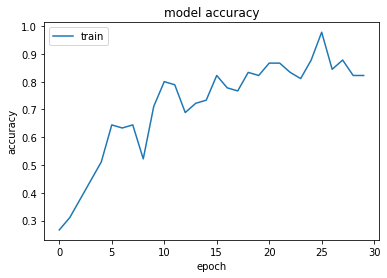

In [14]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(history)

***evaluation of the model***

In [15]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 2s 2s/step - loss: 1.4109 - accuracy: 0.4000


[1.410923957824707, 0.4000000059604645]